In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [12]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= 1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [13]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [14]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [15]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


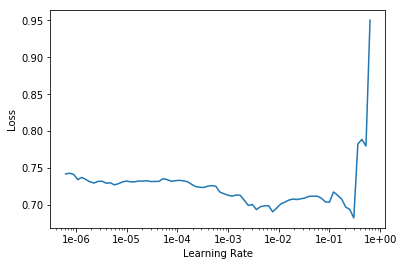

In [16]:
learn.recorder.plot()

In [17]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:32
epoch  train_loss  valid_loss  accuracy
1      0.692252    0.599874    0.706564  (00:07)
2      0.670851    0.559310    0.729730  (00:07)
3      0.646467    0.523435    0.756757  (00:07)
4      0.594933    0.542696    0.722008  (00:09)



In [18]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:10
epoch  train_loss  valid_loss  accuracy
1      0.565032    0.441901    0.845560  (00:24)
2      0.586450    0.392663    0.872587  (00:19)
3      0.533184    0.463635    0.810811  (00:22)
4      0.492971    0.364729    0.884170  (00:23)
5      0.488771    0.378454    0.888031  (00:20)
6      0.493265    0.376156    0.888031  (00:19)
7      0.505154    0.351165    0.880309  (00:18)
8      0.442322    0.316063    0.899614  (00:22)
9      0.437628    0.299145    0.907336  (00:19)
10     0.393508    0.286756    0.895753  (00:21)
11     0.385973    0.379506    0.857143  (00:22)
12     0.351041    0.296239    0.926641  (00:23)
13     0.292307    0.236596    0.930502  (00:24)
14     0.328540    0.254787    0.915058  (00:20)
15     0.329816    0.224471    0.918919  (00:23)
16     0.364050    0.233920    0.922780  (00:19)
17     0.306528    0.245454    0.915058  (00:22)
18     0.312945    0.269523    0.903475  (00:21)
19     0.275735    0.263163    0.907336  (00:22)
20     0.31

In [19]:
learn.validate()

[0.24016191, tensor(0.9228)]

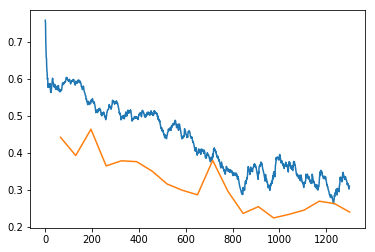

In [20]:
learn.recorder.plot_losses()

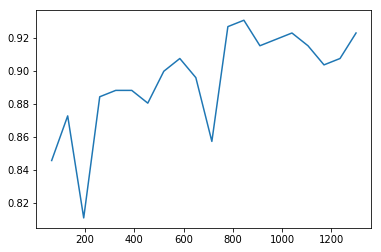

In [21]:
learn.recorder.plot_metrics()

In [22]:
import torch

torch.cuda.empty_cache()